<a href="https://colab.research.google.com/github/MedwillTech/MedwillTech/blob/main/Exercice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Créer des modèles Machine Learning classiques avec un apprentissage supervisé

**1-Définir l’apprentissage supervisé et non supervisé.**

**2-Explorer comment les fonctions de coût impactent le processus d’entraînement.**

**3-Découvrez comment optimiser les modèles en utilisant la descente de gradient.**

**4-Expérimenter des taux d’apprentissage et voir leur impact possible sur l’entraînement.**

**Qu’est-ce que l’apprentissage supervisé ?**

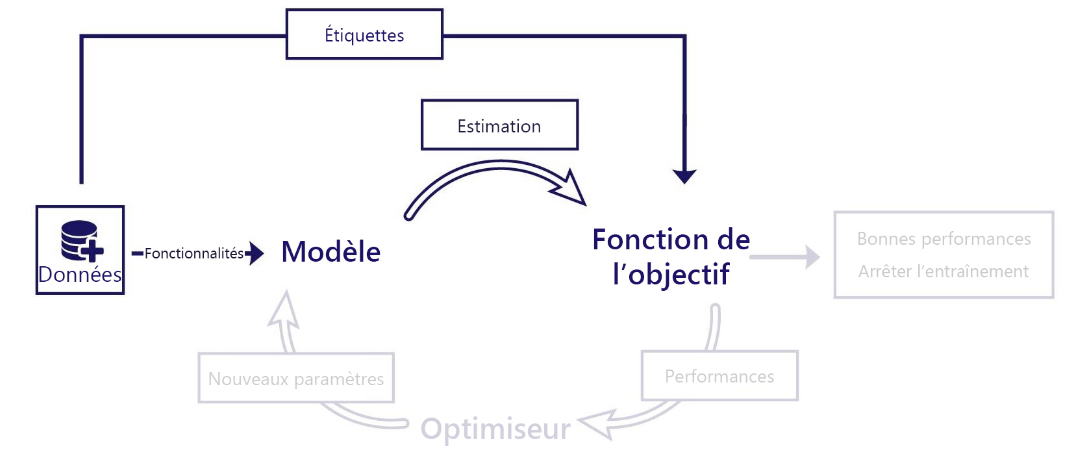

Rappelons notre scénario agricole, dans lequel nous voulons étudier l'évolution des températures de janvier au fil du temps. Nous allons maintenant construire un modèle qui permet d'atteindre cet objectif en utilisant l'apprentissage supervisé.

Grâce à de nombreuses bibliothèques, nous pouvons construire un modèle en quelques lignes de code seulement. Nous allons ici décomposer le processus en plusieurs étapes afin d'explorer le fonctionnement de l'ensemble.

Quatre composants
Rappelons que l'apprentissage supervisé comporte quatre éléments clés :

*1-les données,*

*2-le modèle,*

*3-la fonction de coût et*

*4-l'optimiseur.*

Examinons ces éléments un par un.

In [2]:
import pandas as pd
import requests as rq
url_optimizer="https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0b_optimizer.py"

response=rq.get(url_optimizer)
with open("m0b_optimizer.py","w") as file: # telechargement de l'optimizer
  file.write(response.text)

url_dataset="https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv"
response=rq.get(url_dataset)

with open("seattleWeather_1948-2017.csv","wb") as file: # telechargement binaire
  file.write(response.content)

#Lire les données csv

df=pd.read_csv("seattleWeather_1948-2017.csv")

print(df.head(10))# Montre le tableau des differentes temperatures


         date  amount_of_precipitation  max_temperature  min_temperature  rain
0  1948-01-01                     0.47               51               42  True
1  1948-01-02                     0.59               45               36  True
2  1948-01-03                     0.42               45               35  True
3  1948-01-04                     0.31               45               34  True
4  1948-01-05                     0.17               45               32  True
5  1948-01-06                     0.44               48               39  True
6  1948-01-07                     0.41               50               40  True
7  1948-01-08                     0.04               48               35  True
8  1948-01-09                     0.12               50               31  True
9  1948-01-10                     0.74               43               34  True


In [3]:
df.info() # information sur les données
#Nous avons 25551 ligne de données
#il y a 5 colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     25551 non-null  object 
 1   amount_of_precipitation  25548 non-null  float64
 2   max_temperature          25551 non-null  int64  
 3   min_temperature          25551 non-null  int64  
 4   rain                     25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [4]:
df.describe() # description des données

,amount_of_precipitation,max_temperature,min_temperature
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


Nous allons analyser la relation entre la date et les températures minimales quotidiennes. Examinons rapidement nos données sous la forme d'un graphique.

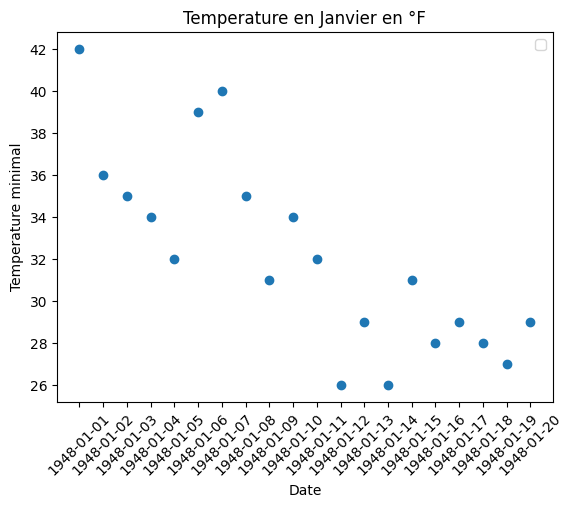

In [5]:
import matplotlib.pyplot as plt
df=df[:20]
plt.scatter(df['date'],df['min_temperature'])
plt.xlabel("Date")
plt.ylabel("Temperature minimal")
plt.title("Temperature en Janvier en °F")
plt.xticks(rotation=45)
plt.legend()

L'apprentissage automatique fonctionne généralement mieux lorsque les axes X et Y ont à peu près la même plage de valeurs.

(array([-34.  , -33.99, -33.98, -33.97, -33.96, -33.95, -33.94]),
 [Text(-34.0, 0, '−34.00'),
  Text(-33.989999999999995, 0, '−33.99'),
  Text(-33.980000000000004, 0, '−33.98'),
  Text(-33.97, 0, '−33.97'),
  Text(-33.96, 0, '−33.96'),
  Text(-33.95, 0, '−33.95'),
  Text(-33.94, 0, '−33.94')])

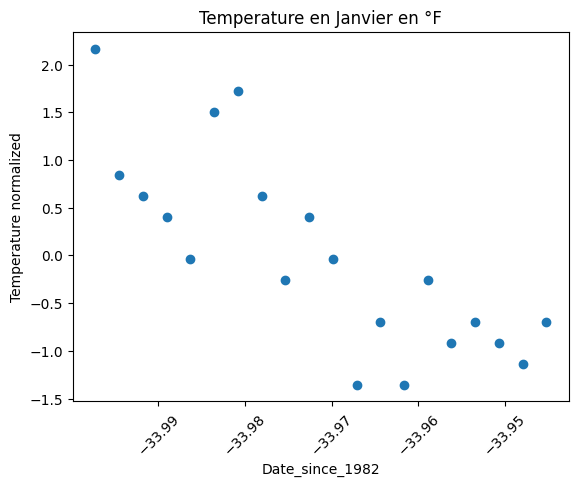

In [6]:
import numpy as np
#convertissons la colonne date en datetime
# mettons les données x et y a la meme echelle
# prenons l'echantillons de données sur la colonne date depuis 1982
# normalisons la temperature par Min-Mean
df['date']=pd.to_datetime(df['date'])

df["date_since_1982"]=[(d.year + d.timetuple().tm_yday/365.25)-1982 for d in df.date]
df["min_temperature_normalized"]=(df["min_temperature"]-np.mean(df["min_temperature"]))/ np.std(df["min_temperature"])

#graph

plt.scatter(df['date_since_1982'],df['min_temperature_normalized'])
plt.xlabel("Date_since_1982")
plt.ylabel("Temperature normalized")
plt.title("Temperature en Janvier en °F")
plt.xticks(rotation=45)


**The model**

Nous choisirons un modèle de régression linéaire simple. Ce modèle utilise une ligne pour faire des estimations.

In [13]:
# creation de model
class MyModel:
  """
  nous allons creé un nouveau Model
  """
  def __init__(self):
    """
    La fonction est du forme y=ßX +b donc deux paramettre qui sont ß=coeficient et b=interception
    """
    self.slope=0
    self.intercept=0
    # Faisons maintenant une fonction de prediction en fonction de la date
  def prediction(self,date):
    return self.slope*date + self.intercept

model=MyModel()
print("le model est crée")


le model est crée


Normalement, nous n'utiliserions pas un modèle avant qu'il n'ait été entraîné, mais pour les besoins de l'apprentissage, jetons-y un coup d'œil rapide.

Les paramettre du Model avant le training est: 0,0
Model avant le training!:


Text(0.5, 1.0, 'Temperature en Janvier en °F')

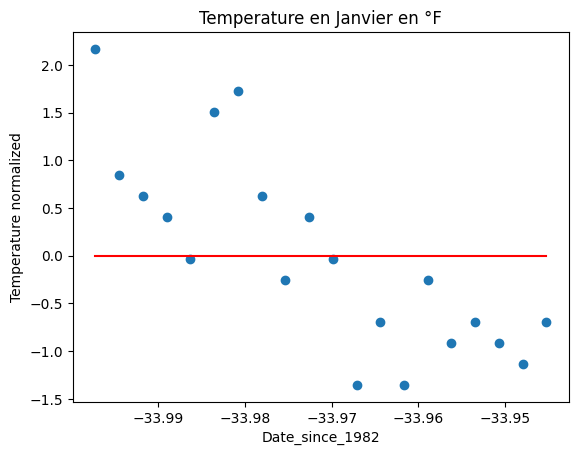

In [14]:
print(f"Les paramettre du Model avant le training est: {model.slope},{model.intercept}")

# visualisation du model avant le training
print("Model avant le training!:")

plt.scatter(df['date_since_1982'],df['min_temperature_normalized'])
plt.plot(df['date_since_1982'],model.prediction(df['date_since_1982']),color="red")
plt.xlabel("Date_since_1982")
plt.ylabel("Temperature normalized")
plt.title("Temperature en Janvier en °F")

**The cost (objective) function**

L'étape suivante consiste à créer une fonction de coût (fonction objective).

Dans l'apprentissage supervisé, ces fonctions comparent l'estimation du modèle à la réponse correcte. Dans notre cas, notre étiquette est la température. Notre fonction de coût compare donc la température estimée aux températures observées dans les archives historiques.

In [15]:
def cost_function(actual_temperature,estimed_temperature):
  '''
    Calcule la différence entre la température réelle et la température estimée
    Renvoie la différence, ainsi que le carré de la différence (le coût).

    températures_réelles : Une ou plusieurs températures enregistrées dans le passé
    températures_estimées : Température(s) correspondante(s) estimée(s) par le modèle
    '''
  difference=estimed_temperature-actual_temperature
  cost=sum(difference**2)
  return difference,cost

**The optimizer**

Le rôle de l'optimiseur est de deviner les nouvelles valeurs des paramètres du modèle.

Nous n'avons pas encore abordé les optimiseurs en détail, donc pour simplifier les choses, nous utiliserons un optimiseur pré-écrit

In [16]:
from m0b_optimizer import MyOptimizer

# crer l'optimiseur
optimizer=MyOptimizer()


**The training loop**

Rassemblons ces composants de manière à ce qu'ils entraînent le modèle.

Tout d'abord, créons une fonction qui effectue une itération d'entraînement. Lisez attentivement chaque étape du code suivant. Si vous le souhaitez, ajoutez quelques instructions print() à l'intérieur de la méthode pour vous aider à voir l'apprentissage en action.

In [20]:
def train_one_iteration(model_inputs,true_temperatures,last_cost:float):
  '''
    Exécute une seule itération de formation.


    model_inputs : Une ou plusieurs dates pour fournir le modèle (dates)
    true_temperatues : Températures correspondantes connues pour se produire à ces dates

    Résultats :
        Un booléen indiquant si la formation doit se poursuivre.
        Le coût calculé (les petits nombres sont préférables)
    '''
  estimed_temperature=model.prediction(model_inputs)

  # utilisons la function cost_function pour voire le cout engendré
  difference,cost=cost_function(true_temperatures,estimed_temperature)

  # Décider s'il faut poursuivre la formation
  # Nous arrêterons si l'entraînement n'améliore plus le modèle de manière efficace.
  if cost>last_cost:
    return False,last_cost
  else:
    intercept_update, slope_update= optimizer.get_parameter_updates(model_inputs,cost,difference)
    model.intercept+=intercept_update
    model.slope+=slope_update
    return True,cost
print(f"Les paramettre du Model après le training est: {model.slope},{model.intercept}")
print("Le model est maintenant entrainé")


Les paramettre du Model après le training est: 0,0


Exécutons quelques itérations manuellement, afin de pouvoir observer le fonctionnement de la formation.

Exécutez le code suivant plusieurs fois et notez l'évolution du modèle.

In [30]:
import math

print(f"Paramètres du modèle avant l'entraînement:\t\t{model.intercept:.8f},\t{model.slope:.8f}")

continue_loop, cost = train_one_iteration(model_inputs = df["years_since_1982"],
                                                    true_temperatures = df["normalised_temperature"],
                                                    last_cost = math.inf)

print(f"Paramètres du modèle après 1 itération d'entraînement:\t{model.intercept:.8f},\t{model.slope:.8f}")

Paramètres du modèle avant l'entraînement:		-0.00000000,	-0.00000047
Paramètres du modèle après 1 itération d'entraînement:	-0.00000000,	-0.00000070


Il faudra des milliers d'itérations pour entraîner correctement le modèle, c'est pourquoi nous allons l'intégrer dans une boucle.

In [32]:
# Start the loop
print("Training beginning...")
last_cost = math.inf
i = 0
continue_loop = True
while continue_loop:

    # Exécuter une itération de l'entraînement
    # Cela nous indiquera s'il faut arrêter l'entraînement, et aussi quel
    # le coût de cette itération
    continue_loop, last_cost = train_one_iteration(model_inputs = df["years_since_1982"],
                                                    true_temperatures = df["normalised_temperature"],
                                                    last_cost = last_cost)

    # Print le status
    if i % 400 == 0:
        print("Iteration:", i)

    i += 1


print("Training complete!")
print(f"Paramètres du modèle après l'entraînement:\t{model.intercept:.8f},\t{model.slope:.8f}")

plt.scatter(df["years_since_1982"], df["normalised_temperature"])
plt.plot(df["years_since_1982"], model.predict(df["years_since_1982"]), 'r', label='Fitted line')

# ajouté l'étiquette et legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Iteration: 2294000
Iteration: 2294400
Iteration: 2294800
Iteration: 2295200
Iteration: 2295600
Iteration: 2296000
Iteration: 2296400
Iteration: 2296800
Iteration: 2297200
Iteration: 2297600
Iteration: 2298000
Iteration: 2298400
Iteration: 2298800
Iteration: 2299200
Iteration: 2299600
Iteration: 2300000
Iteration: 2300400
Iteration: 2300800
Iteration: 2301200
Iteration: 2301600
Iteration: 2302000
Iteration: 2302400
Iteration: 2302800
Iteration: 2303200
Iteration: 2303600
Iteration: 2304000
Iteration: 2304400
Iteration: 2304800
Iteration: 2305200
Iteration: 2305600
Iteration: 2306000
Iteration: 2306400
Iteration: 2306800
Iteration: 2307200
Iteration: 2307600
Iteration: 2308000
Iteration: 2308400
Iteration: 2308800
Iteration: 2309200
Iteration: 2309600
Iteration: 2310000
Iteration: 2310400
Iteration: 2310800
Iteration: 2311200
Iteration: 2311600
Iteration: 2312000
Iteration: 2312400
Iteration: 2312800
Iteration: 2313200
It

KeyboardInterrupt: 